In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [123]:
start = "2019-04-05"
end = "2024-04-05"

aapl = yf.download("AAPL", start, end)
samsung = yf.download("005930.KS", start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


#### Data Preview

In [124]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,49.112499,49.275002,48.982498,49.250000,47.412922,74106400
2019-04-08,49.105000,50.057499,49.084999,50.025002,48.159016,103526800
2019-04-09,50.080002,50.712502,49.807499,49.875000,48.014610,143072800
2019-04-10,49.669998,50.185001,49.544998,50.154999,48.284161,86781200
2019-04-11,50.212502,50.250000,49.610001,49.737499,47.882233,83603200
...,...,...,...,...,...,...
2024-03-28,171.750000,172.229996,170.509995,171.479996,171.479996,65672700
2024-04-01,171.190002,171.250000,169.479996,170.029999,170.029999,46240500
2024-04-02,169.080002,169.339996,168.229996,168.839996,168.839996,49329500


In [125]:
samsung


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,46950.0,47550.0,46600.0,46850.0,41157.730469,8546339
2019-04-08,47250.0,47250.0,46150.0,46650.0,40982.035156,8507909
2019-04-09,46700.0,46950.0,46200.0,46650.0,40982.035156,6878761
2019-04-10,46400.0,46700.0,46050.0,46700.0,41025.953125,11883995
2019-04-11,46700.0,46800.0,46150.0,46250.0,40630.636719,13697399
...,...,...,...,...,...,...
2024-03-29,81200.0,82500.0,80900.0,82400.0,82400.000000,27126366
2024-04-01,83200.0,83300.0,82000.0,82000.0,82000.000000,20116513
2024-04-02,82900.0,85000.0,82900.0,85000.0,85000.000000,37077944


### Apple Data Cleaning/Preprocessing

In [126]:
aapl.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [127]:
aapl.shape

(1258, 6)

In [128]:
# Handling outliers in the Close Column

z_scores = (aapl['Close'] - aapl['Close'].mean()) / aapl['Close'].std()

outliers = z_scores.abs() > 3

aapl = aapl[~outliers]

aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,49.112499,49.275002,48.982498,49.250000,47.412922,74106400
2019-04-08,49.105000,50.057499,49.084999,50.025002,48.159016,103526800
2019-04-09,50.080002,50.712502,49.807499,49.875000,48.014610,143072800
2019-04-10,49.669998,50.185001,49.544998,50.154999,48.284161,86781200
2019-04-11,50.212502,50.250000,49.610001,49.737499,47.882233,83603200
...,...,...,...,...,...,...
2024-03-28,171.750000,172.229996,170.509995,171.479996,171.479996,65672700
2024-04-01,171.190002,171.250000,169.479996,170.029999,170.029999,46240500
2024-04-02,169.080002,169.339996,168.229996,168.839996,168.839996,49329500


In [129]:
aapl.shape

(1258, 6)

In [130]:
# Checking aapl consistency in column headers and aapl types
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-04-05 to 2024-04-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


### Samsung Data Cleaning/Preprocessing

In [131]:
samsung.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [132]:
samsung.shape

(1233, 6)

In [133]:
# Handling outliers in the Close Column

z_scores = (samsung['Close'] - samsung['Close'].mean()) / samsung['Close'].std()

outliers = z_scores.abs() > 3

samsung = samsung[~outliers]

samsung

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,46950.0,47550.0,46600.0,46850.0,41157.730469,8546339
2019-04-08,47250.0,47250.0,46150.0,46650.0,40982.035156,8507909
2019-04-09,46700.0,46950.0,46200.0,46650.0,40982.035156,6878761
2019-04-10,46400.0,46700.0,46050.0,46700.0,41025.953125,11883995
2019-04-11,46700.0,46800.0,46150.0,46250.0,40630.636719,13697399
...,...,...,...,...,...,...
2024-03-29,81200.0,82500.0,80900.0,82400.0,82400.000000,27126366
2024-04-01,83200.0,83300.0,82000.0,82000.0,82000.000000,20116513
2024-04-02,82900.0,85000.0,82900.0,85000.0,85000.000000,37077944


In [134]:
samsung.shape

(1233, 6)

In [135]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2019-04-05 to 2024-04-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1233 non-null   float64
 1   High       1233 non-null   float64
 2   Low        1233 non-null   float64
 3   Close      1233 non-null   float64
 4   Adj Close  1233 non-null   float64
 5   Volume     1233 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.4 KB


In [136]:
samsung.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,46950.0,47550.0,46600.0,46850.0,41157.730469,8546339
2019-04-08,47250.0,47250.0,46150.0,46650.0,40982.035156,8507909
2019-04-09,46700.0,46950.0,46200.0,46650.0,40982.035156,6878761
2019-04-10,46400.0,46700.0,46050.0,46700.0,41025.953125,11883995
2019-04-11,46700.0,46800.0,46150.0,46250.0,40630.636719,13697399


In [137]:
# Converting KRW to USD for Samsung Stock

samsung['Open'] = samsung['Open'] * (0.00074)
samsung['High'] = samsung['High'] * (0.00074)
samsung['Low'] = samsung['Low'] * (0.00074)
samsung['Close'] = samsung['Close'] * (0.00074)
samsung['Adj Close'] = samsung['Adj Close'] * (0.00074)

samsung

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-05,34.743,35.187,34.484,34.669,30.456721,8546339
2019-04-08,34.965,34.965,34.151,34.521,30.326706,8507909
2019-04-09,34.558,34.743,34.188,34.521,30.326706,6878761
2019-04-10,34.336,34.558,34.077,34.558,30.359205,11883995
2019-04-11,34.558,34.632,34.151,34.225,30.066671,13697399
...,...,...,...,...,...,...
2024-03-29,60.088,61.050,59.866,60.976,60.976000,27126366
2024-04-01,61.568,61.642,60.680,60.680,60.680000,20116513
2024-04-02,61.346,62.900,61.346,62.900,62.900000,37077944


## Exploratory Data Analysis

In [138]:
# Describe numerical data for Apple & Samsung stock

samsung.describe()
aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,130.054187,131.518893,128.689183,130.175395,128.638817,9.825188e+07
std,44.235810,44.580063,43.874981,44.242189,44.571390,5.199738e+07
min,43.860001,44.480000,42.567501,43.325001,41.869553,2.404830e+07
25%,92.096876,93.307501,91.235626,92.672499,90.628117,6.482710e+07
50%,141.724998,143.394997,139.474998,141.955002,140.226288,8.492310e+07
75%,166.565006,168.672504,165.092499,166.372498,164.869972,1.151837e+08
max,198.020004,199.619995,197.000000,198.110001,197.857529,4.265100e+08


In [139]:
aapl.info()
samsung.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-04-05 to 2024-04-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2019-04-05 to 2024-04-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1233 non-null   float64
 1   High       1233 non-null   float64
 2   Low        1233 non-null   float64
 3   Close      1233 non-null   float64
 4   Adj Close  1233 non-null   float64
 5   Volume     1233 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.4 KB


Volume of Stocks Traded 

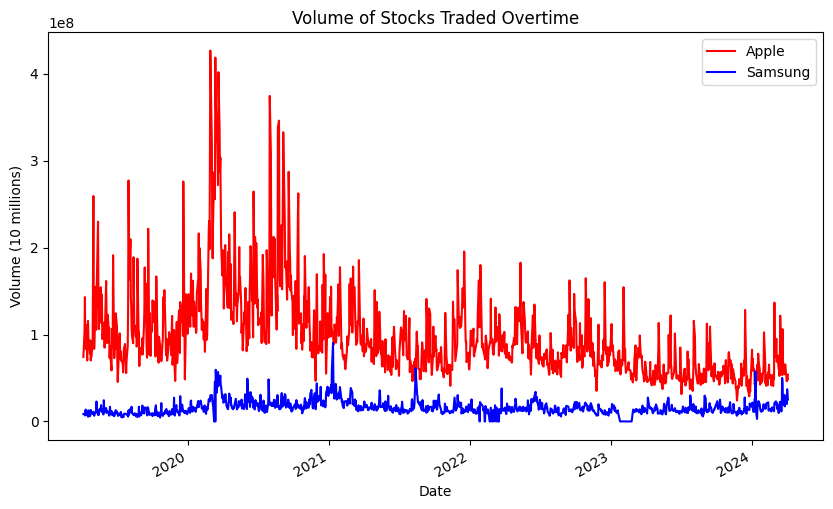

In [140]:
plt.figure(figsize=(10,6))
aapl['Volume'].plot(label='Apple', color='red')
samsung['Volume'].plot(label='Samsung', color='blue')
plt.ylabel('Volume (10 millions)')
plt.legend()
plt.title('Volume of Stocks Traded Overtime')
plt.show()

Low Stocks Traded Overtime

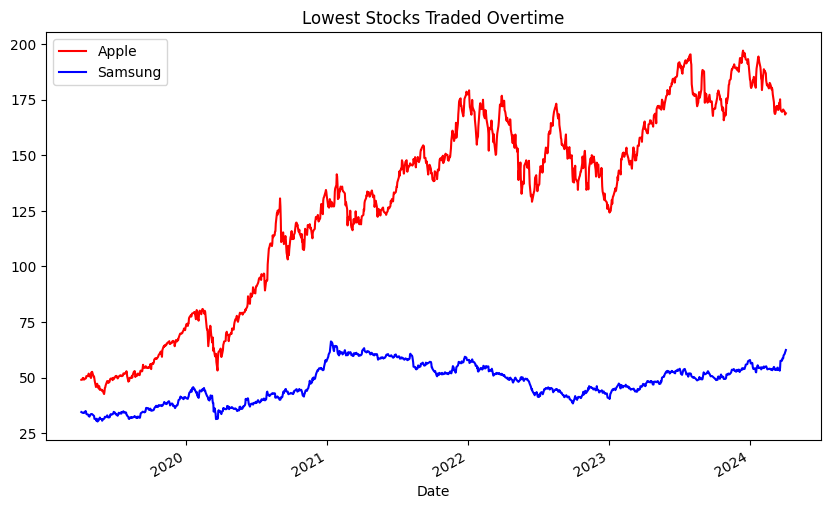

In [141]:
plt.figure(figsize=(10,6))
aapl['Low'].plot(label='Apple', color='red')
samsung['Low'].plot(label='Samsung', color='blue')
plt.legend()
plt.title('Lowest Stocks Traded Overtime')
plt.show()

Highest Stocks Traded Overtime

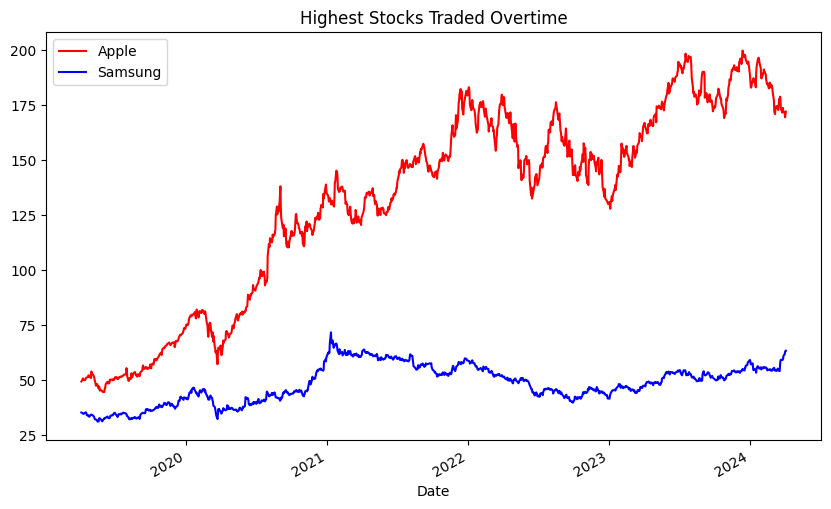

In [142]:
plt.figure(figsize=(10,6))
aapl['High'].plot(label='Apple', color='red')
samsung['High'].plot(label='Samsung', color='blue')
plt.legend()
plt.title('Highest Stocks Traded Overtime')
plt.show()

  Plotting Closing Time Series

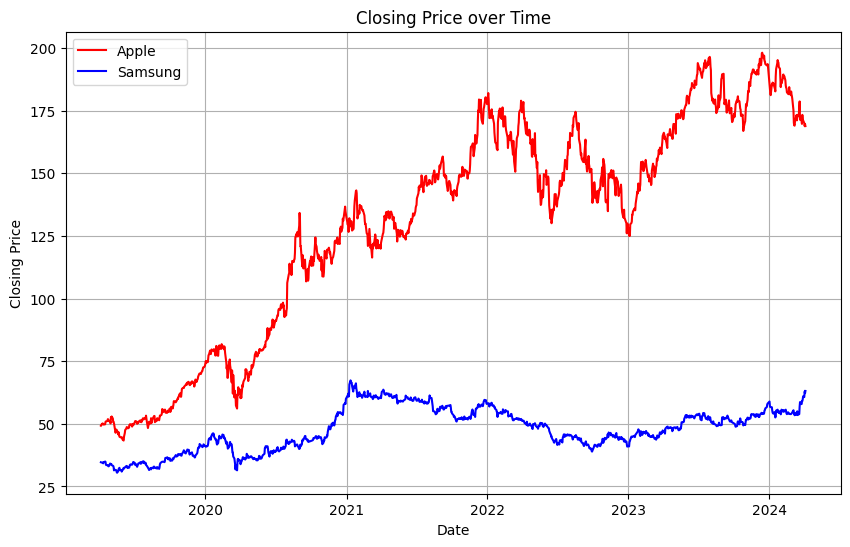

In [143]:
plt.figure(figsize=(10,6))
plt.plot(aapl.index, aapl['Close'], color='red', label='Apple')
plt.plot(samsung.index, samsung['Close'], color='blue', label='Samsung')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price over Time')
plt.legend()
plt.grid()
plt.show()

In [144]:
# Grabbing data for 2023-2024 only

aapl_dates_2023_2024 = aapl[(aapl.index.year == 2023) | (aapl.index.year == 2024)]
aapl_close_2023_2024 = aapl[(aapl.index.year == 2023) | (aapl.index.year == 2024)]['Close']

samsung_dates_2023_2024 = samsung[(samsung.index.year == 2023) | (samsung.index.year == 2024)]
samsung_close_2023_2024 = samsung[(samsung.index.year == 2023) | (samsung.index.year == 2024)]['Close']

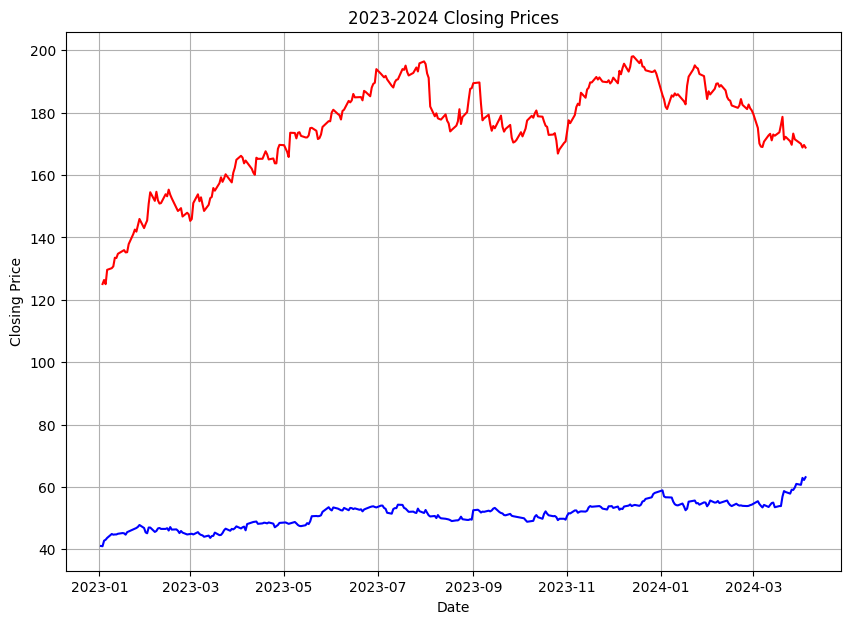

In [145]:
plt.figure(figsize=(10, 7))
plt.plot(aapl_dates_2023_2024.index, aapl_close_2023_2024, color='red')
plt.plot(samsung_dates_2023_2024.index, samsung_close_2023_2024, color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('2023-2024 Closing Prices')
plt.grid()
plt.show()

In [146]:
aapl['MA_50'] = aapl['Close'].rolling(window=50).mean()
aapl['MA_50']

aapl['MA_200'] = aapl['Close'].rolling(window=200).mean()
aapl['MA_200']

Date
2019-04-05          NaN
2019-04-08          NaN
2019-04-09          NaN
2019-04-10          NaN
2019-04-11          NaN
                ...    
2024-03-28    183.52095
2024-04-01    183.45455
2024-04-02    183.37900
2024-04-03    183.29720
2024-04-04    183.21670
Name: MA_200, Length: 1258, dtype: float64

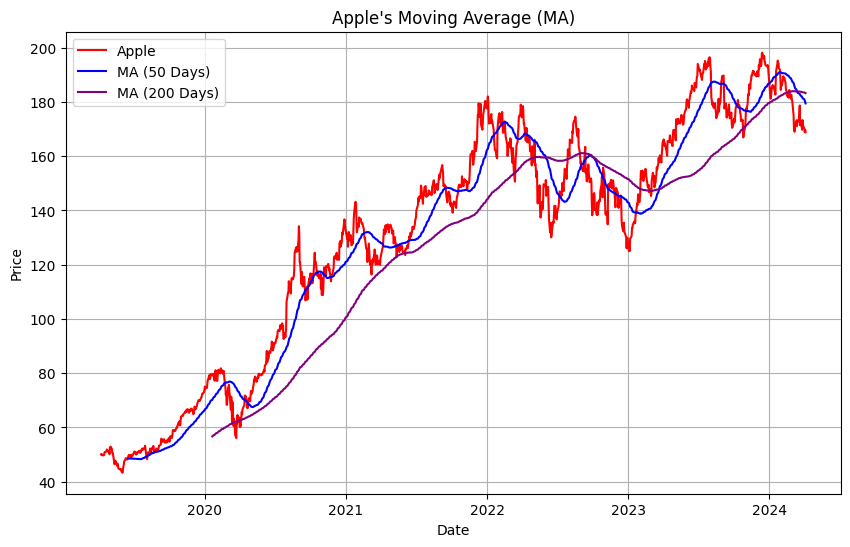

In [167]:
plt.figure(figsize=(10, 6))
plt.plot(aapl.index, aapl['Close'], color='red', label='Apple')
plt.plot(aapl.index, aapl['MA_50'], color='blue', label='MA (50 Days)')
plt.plot(aapl.index, aapl['MA_200'], color='purple', label='MA (200 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple\'s Moving Average (MA)')
plt.legend()
plt.grid(True)
plt.show()

In [148]:
samsung['MA_50'] = samsung['Close'].rolling(window=50).mean()
samsung['MA_50']

samsung['MA_200'] = samsung['Close'].rolling(window=200).mean()
samsung['MA_200']

Date
2019-04-05         NaN
2019-04-08         NaN
2019-04-09         NaN
2019-04-10         NaN
2019-04-11         NaN
                ...   
2024-03-29    53.12127
2024-04-01    53.16234
2024-04-02    53.21044
2024-04-03    53.25891
2024-04-04    53.30812
Name: MA_200, Length: 1233, dtype: float64

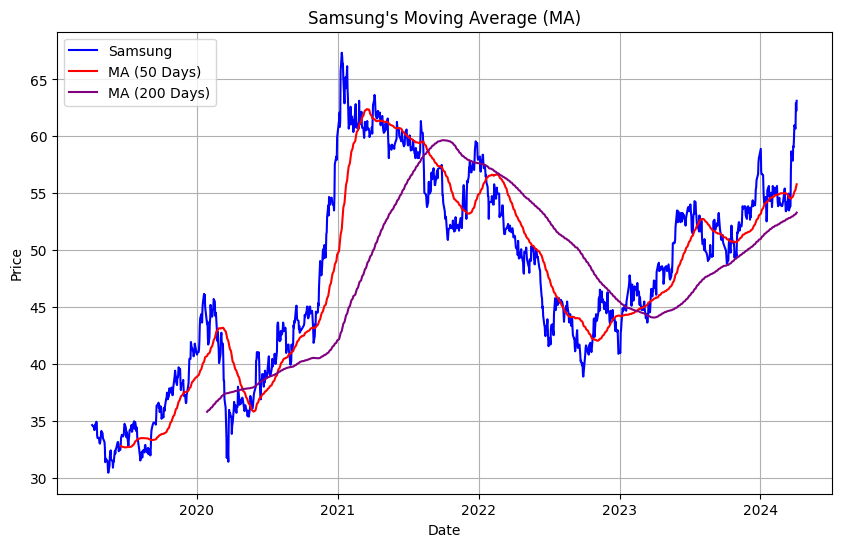

In [149]:
plt.figure(figsize=(10, 6))
plt.plot(samsung.index, samsung['Close'], color='blue', label='Samsung')
plt.plot(samsung.index, samsung['MA_50'], color='red', label='MA (50 Days)')
plt.plot(samsung.index, samsung['MA_200'], color='purple', label='MA (200 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Samsung\'s Moving Average (MA)')
plt.legend()
plt.grid(True)
plt.show()

In [150]:
aapl_MA_14_2023_2024 = aapl[(aapl.index.year == 2023) | (aapl.index.year == 2024)]['Close'].rolling(window=14).mean()

aapl_MA_30_2023_2024 = aapl[(aapl.index.year == 2023) | (aapl.index.year == 2024)]['Close'].rolling(window=30).mean()

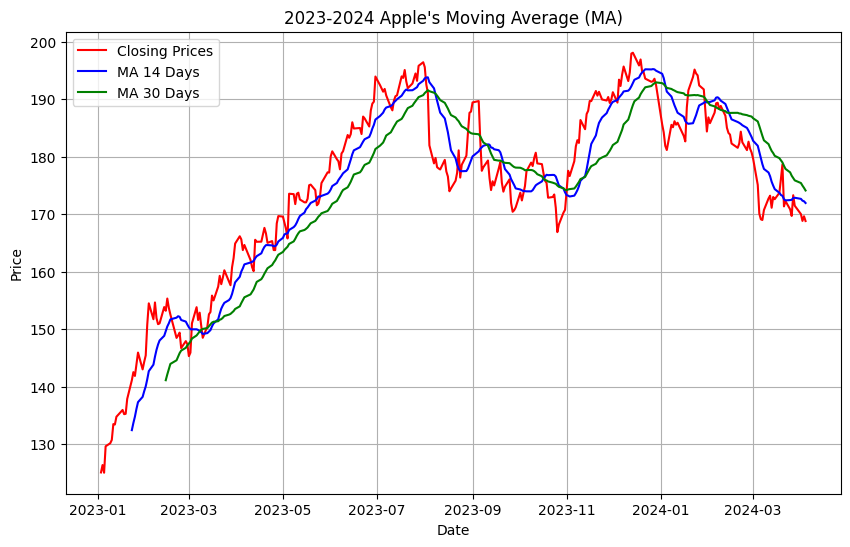

In [166]:
# Plotting 2023-2024 Apple SMA for 14/30/90 Days
plt.figure(figsize=(10, 6))
plt.plot(aapl_dates_2023_2024.index, aapl_close_2023_2024, color='red', label='Closing Prices')
plt.plot(aapl_dates_2023_2024.index, aapl_MA_14_2023_2024, color='blue', label='MA 14 Days')
plt.plot(aapl_dates_2023_2024.index, aapl_MA_30_2023_2024, color='green', label='MA 30 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2023-2024 Apple\'s Moving Average (MA)')
plt.legend()
plt.grid(True)
plt.show()

In [152]:
samsung_MA_14_2023_2024 = samsung[(samsung.index.year == 2023) | (samsung.index.year == 2024)]['Close'].rolling(window=14).mean()

samsung_MA_30_2023_2024 = samsung[(samsung.index.year == 2023) | (samsung.index.year == 2024)]['Close'].rolling(window=30).mean()

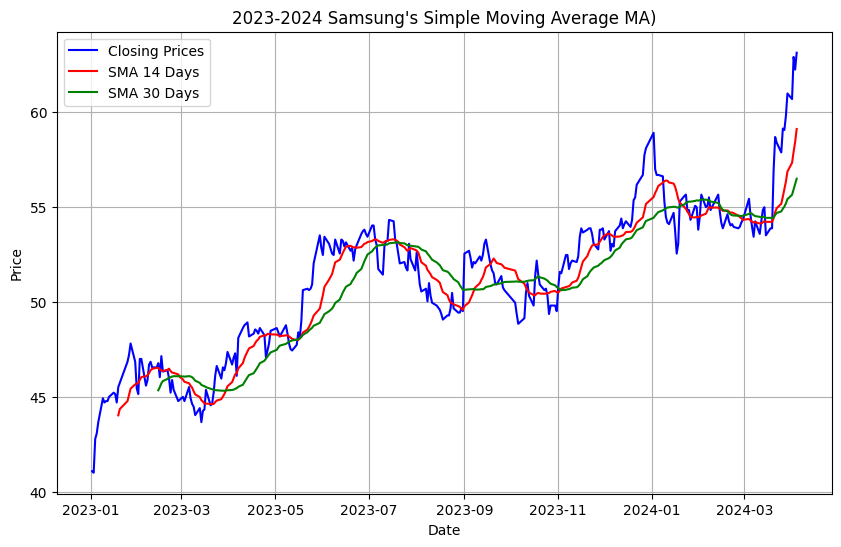

In [153]:
# Plotting 2023-2024 Apple SMA for 14/30/90 Days
plt.figure(figsize=(10, 6))
plt.plot(samsung_dates_2023_2024.index, samsung_close_2023_2024, color='blue', label='Closing Prices')
plt.plot(samsung_dates_2023_2024.index, samsung_MA_14_2023_2024, color='red', label='SMA 14 Days')
plt.plot(samsung_dates_2023_2024.index, samsung_MA_30_2023_2024, color='green', label='SMA 30 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2023-2024 Samsung\'s Simple Moving Average MA)')
plt.legend()
plt.grid(True)
plt.show()

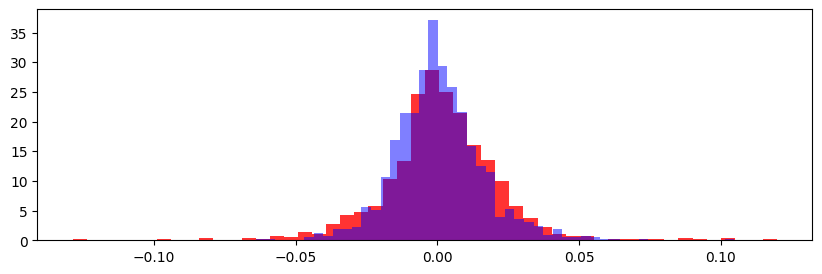

In [154]:
# Calculating Apple's Daily Return
aapl['Return'] = (aapl['Close']/aapl['Close'].shift(1)) - 1
aapl.dropna(subset=['Return'], inplace=True)
aapl['Return']

# Calculating Samsung's Daily Return
samsung['Return'] = (samsung['Close']/samsung['Close'].shift(1)) - 1
samsung.dropna(subset=['Return'], inplace=True)
samsung['Return']

# Plot Apple's Return
plt.figure(figsize=(10, 3))
plt.hist(aapl['Return'], bins=50, color='red', alpha=0.8, density=True)
# Plot Samsung's Return
plt.hist(samsung['Return'], bins=50, color='blue', alpha=0.5, density=True)
plt.show()

Relative Strength Index

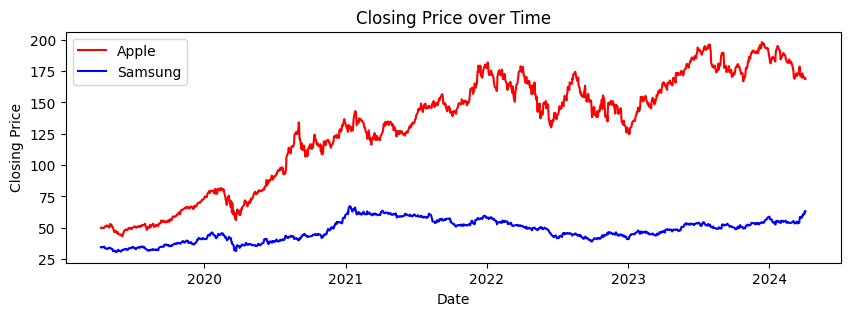

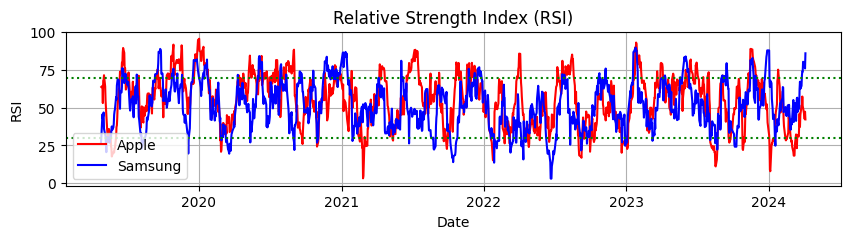

In [155]:

def calculate_rsi(dataframe, window=14):
    # Calculate price changes
    delta = dataframe['Close'].diff(1)
    
    # Separate gains (positive changes) and losses (negative changes)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    
    # Calculate RS (Relative Strength)
    rs = gain / loss
    
    # Calculate RSI (Relative Strength Index)
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Assuming 'aapl' is your aaplFrame containing historical stock price aapl
aapl['RSI'] = calculate_rsi(aapl)
samsung['RSI'] = calculate_rsi(samsung)
# Plot Closing Price
plt.figure(figsize=(10,3))
plt.plot(aapl.index, aapl['Close'], color='red', label='Apple')
plt.plot(samsung.index, samsung['Close'], color='blue', label='Samsung')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price over Time')
plt.legend()
plt.show()
# Plot RSI
plt.figure(figsize=(10, 2))
plt.plot(aapl.index, aapl['RSI'], color='red', label='Apple')
plt.plot(samsung.index, samsung['RSI'], color='blue', label='Samsung')
plt.axhline(y=70, color='green', linestyle=':')
plt.axhline(y=30, color='green', linestyle=':')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.grid(True)
plt.show()


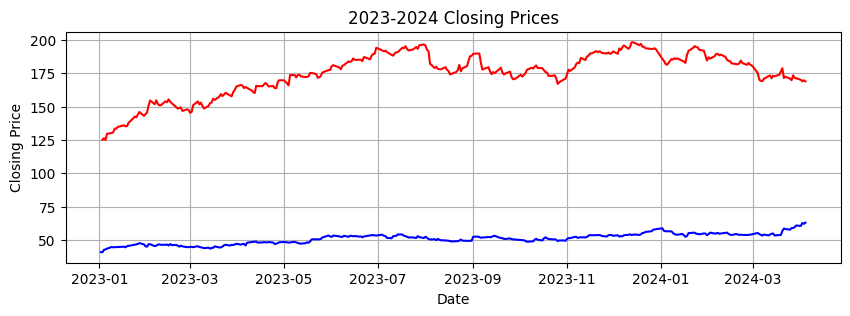

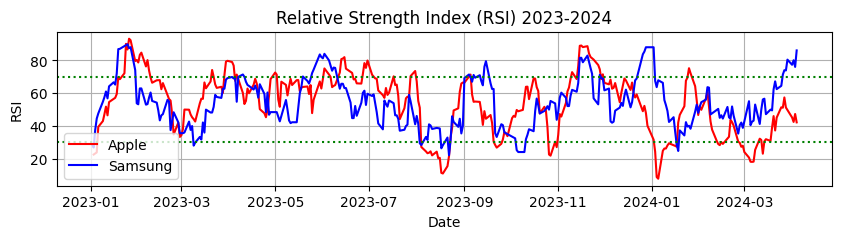

In [156]:
# Plot Closing Prices 2023-2024
plt.figure(figsize=(10, 3))
plt.plot(aapl_dates_2023_2024.index, aapl_close_2023_2024, color='red')
plt.plot(samsung_dates_2023_2024.index, samsung_close_2023_2024, color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('2023-2024 Closing Prices')
plt.grid()
plt.show()
# Plot RSI 2023-2024
plt.figure(figsize=(10,2))
plt.plot(aapl_dates_2023_2024.index, aapl[(aapl.index.year == 2023) | (aapl.index.year == 2024)]['RSI'], color='red', label='Apple')
plt.plot(samsung_dates_2023_2024.index, samsung[(samsung.index.year == 2023) | (samsung.index.year == 2024)]['RSI'], color='blue', label='Samsung')
plt.axhline(y=70, color='green', linestyle=':')
plt.axhline(y=30, color='green', linestyle=':')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI) 2023-2024')
plt.legend()
plt.grid(True)
plt.show()

Volatility Daily Return

In [157]:
aapl['Volatility'] = aapl['Return'].rolling(window=252).std() * (252**.5)

aapl['Volatility']

samsung['Volatility'] = samsung['Return'].rolling(window=252).std() * (252**.5)

samsung['Volatility']

Date
2019-04-08         NaN
2019-04-09         NaN
2019-04-10         NaN
2019-04-11         NaN
2019-04-12         NaN
                ...   
2024-03-29    0.214105
2024-04-01    0.213857
2024-04-02    0.215981
2024-04-03    0.216078
2024-04-04    0.215905
Name: Volatility, Length: 1232, dtype: float64

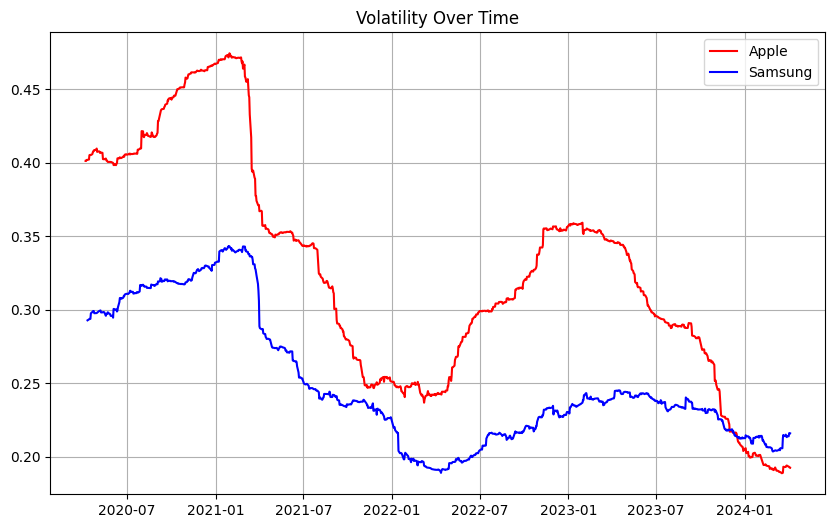

In [158]:
# Plotting volatility using line plot
plt.figure(figsize=(10, 6))
plt.plot(aapl.index, aapl['Volatility'], color='red', label='Apple')
plt.plot(samsung.index, samsung['Volatility'], color='blue', label='Samsung')
plt.title('Volatility Over Time')
plt.legend()
plt.grid(True)
plt.show()


Finding Correlations for Apple & Samsung

In [159]:
aapl_corr = aapl.corr()
aapl_corr

samsung_corr = samsung.corr()
samsung_corr

,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_200,Return,RSI,Volatility
Open,1.000000,0.998625,0.999092,0.997547,0.986120,0.163006,0.939821,0.612786,-0.012210,0.054131,-0.006666
High,0.998625,1.000000,0.998535,0.998935,0.986525,0.186469,0.936581,0.602514,0.015077,0.061715,0.006613
Low,0.999092,0.998535,1.000000,0.998829,0.987619,0.150562,0.940816,0.617715,0.006991,0.057131,-0.012390
Close,0.997547,0.998935,0.998829,1.000000,0.988118,0.168624,0.937211,0.608827,0.039163,0.068393,-0.003453
Adj Close,0.986120,0.986525,0.987619,0.988118,1.000000,0.129589,0.937396,0.650311,0.033409,0.048436,-0.148503
Volume,0.163006,0.186469,0.150562,0.168624,0.129589,1.000000,0.101643,-0.250160,0.072763,0.023776,0.412949
MA_50,0.939821,0.936581,0.940816,0.937211,0.937396,0.101643,1.000000,0.764637,-0.052478,-0.220404,-0.191003
MA_200,0.612786,0.602514,0.617715,0.608827,0.650311,-0.250160,0.764637,1.000000,-0.043160,-0.221807,-0.654356
Return,-0.012210,0.015077,0.006991,0.039163,0.033409,0.072763,-0.052478,-0.043160,1.000000,0.258257,0.070126
RSI,0.054131,0.061715,0.057131,0.068393,0.048436,0.023776,-0.220404,-0.221807,0.258257,1.000000,0.267165


<Axes: >

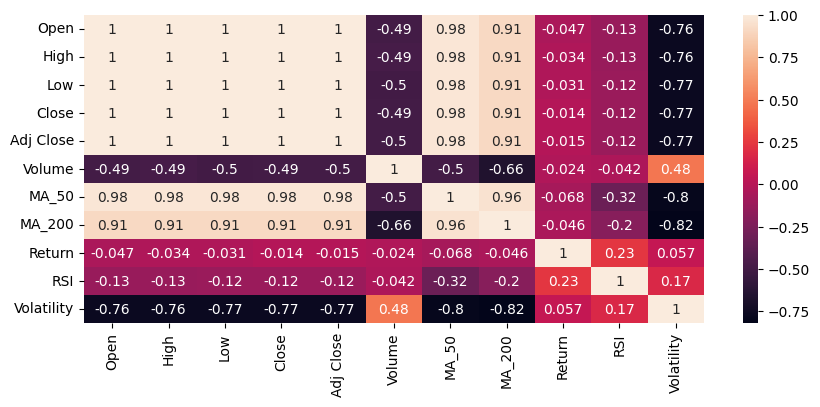

In [160]:
plt.figure(figsize=(10,4))
sns.heatmap(aapl_corr, annot=True)

<Axes: >

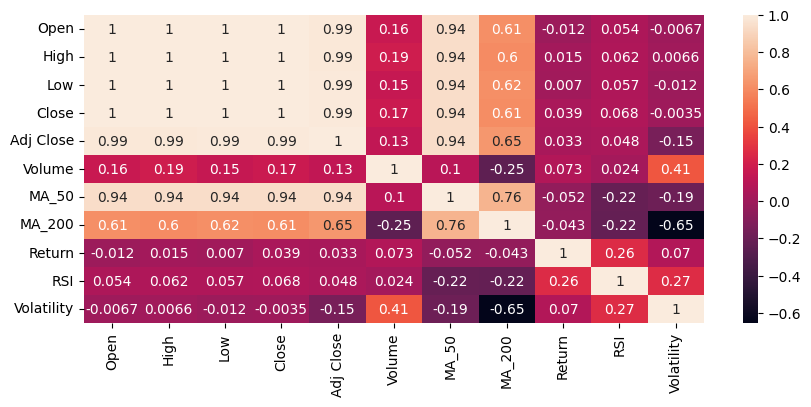

In [161]:
plt.figure(figsize=(10,4))
sns.heatmap(samsung_corr, annot=True)